# Fuel consumption project

- In this project we are going to analyze  parameters that  affects on fuel consumptions 
- We want to build a model that will predict fuel consumption based on car brand,engine power,acceleration,number of cylinder and fuel
- We will use Tensorflow to build  our linear regression  model to predict fuel consumption

## Data exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [2]:
df=pd.read_csv("clean_cars")
df.head()

,car_brand,car_model,fuel,engine_capacity,cylinder,kw,acceleration,max_speed,lenght,width,height,weight,fuel_consumption
0,Volvo,V70,Diesel,2461,5,104,10.6,197.5,4730,1760,1430,1770.0,6.5
1,Hyundai,Santa FE,Petrol,2351,4,109,11.4,173.0,4500,1820,1675,2078.0,9.8
2,Seat,Altea,Petrol,1390,4,93,10.5,194.0,4467,1768,1581,1669.0,6.5
3,Peugeot,206,Diesel,1560,4,81,10.8,190.0,3835,1652,1428,1325.0,4.8
4,Audi,A4,Petrol,1984,4,168,6.4,250.0,4701,1826,1427,1842.5,6.6


Column information:
- car_brand - brand of a car
- car_model - model of a car
- fuel - type of fuel
- engine_capacity - Engine capacity, cc
- cylinder - number of cylinder
- kw - engine power in kilowatt
- max_speed - top speed of a car (km/h)
- lenght - lenght of a car (mm)
- width - width of a car (mm)
- height - height of a car (mm)
- weight - car weight (kg)
- fuel_consumption - combined fuel consumption (l/100 km)

In [3]:
df.shape

(7381, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_brand         7381 non-null   object 
 1   car_model         7381 non-null   object 
 2   fuel              7381 non-null   object 
 3   engine_capacity   7381 non-null   int64  
 4   cylinder          7381 non-null   int64  
 5   kw                7381 non-null   int64  
 6   acceleration      7381 non-null   float64
 7   max_speed         7381 non-null   float64
 8   lenght            7381 non-null   int64  
 9   width             7381 non-null   int64  
 10  height            7381 non-null   int64  
 11  weight            7358 non-null   float64
 12  fuel_consumption  7381 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usage: 749.8+ KB


In [5]:
df.describe()

,engine_capacity,cylinder,kw,acceleration,max_speed,lenght,width,height,weight,fuel_consumption
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7358.000000,7381.000000
mean,2183.873459,4.524319,119.655738,10.371928,202.340198,4465.093890,1769.406178,1487.453462,1667.864841,7.647351
std,909.284926,1.177527,64.247700,3.255200,31.147141,611.685914,85.942975,191.667163,362.039168,2.384718
min,2.000000,1.000000,23.000000,2.800000,28.000000,2500.000000,180.000000,1020.000000,650.000000,3.000000
25%,1598.000000,4.000000,78.000000,8.250000,180.000000,4245.000000,1710.000000,1418.000000,1427.500000,5.900000
50%,1984.000000,4.000000,104.000000,10.200000,200.000000,4487.000000,1770.000000,1455.000000,1642.500000,7.200000
75%,2457.000000,5.000000,142.000000,12.200000,224.000000,4720.000000,1823.000000,1507.000000,1858.500000,8.900000
max,8285.000000,8.000000,601.000000,99.900000,395.000000,46932.000000,2154.000000,14238.000000,10020.500000,22.900000


In [6]:
df.isnull().sum()

car_brand            0
car_model            0
fuel                 0
engine_capacity      0
cylinder             0
kw                   0
acceleration         0
max_speed            0
lenght               0
width                0
height               0
weight              23
fuel_consumption     0
dtype: int64

In [190]:
#droping null values
df2=df.dropna()

In [8]:
df3=df2.copy()

## Finding outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f101ccdeee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f101c5225e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f101ccdeb80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f101c522ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f101c52d040>],
 'means': []}

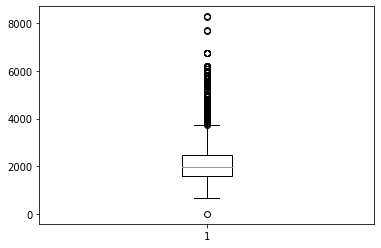

In [9]:
plt.boxplot(df3['engine_capacity'])

In [10]:
#using IQR techique 
threshold=2457+ 1.5*(2457 - 1598)
max_threshold

3745.5

In [11]:
df4=df3[df3.engine_capacity<max_threshold]

In [12]:
lower_threshold= 1598 - 1.5*(2457 - 1598)
lower_threshold

309.5

In [13]:
df5=df4[df4.engine_capacity>lower_threshold]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f101c470be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f101c47e2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f101c470880>],
 'medians': [<matplotlib.lines.Line2D at 0x7f101c47e9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f101c47ed00>],
 'means': []}

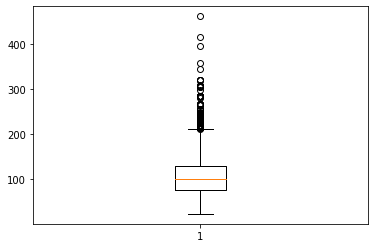

In [14]:
plt.boxplot(df5["kw"])

In [15]:
max_th=130+ 1.5*(130 - 76)
max_th

211.0

In [16]:
df6=df5[df5.kw<max_th]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f101c44bfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f101c3d86a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f101c44bc40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f101c3d8d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f101c3e6100>],
 'means': []}

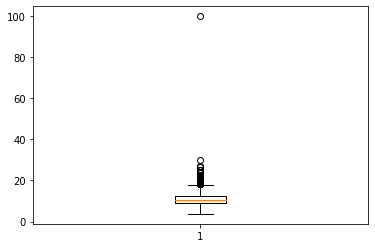

In [17]:
plt.boxplot(df6["acceleration"])

In [18]:
max_thr=12.5+ 1.5*(12.5 - 8.8)
max_thr

18.049999999999997

In [19]:
df7=df6[df6.acceleration<max_thr]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f101c3aefd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f101c3bd6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f101c3aec70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f101c3bdd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f101c3c9130>],
 'means': []}

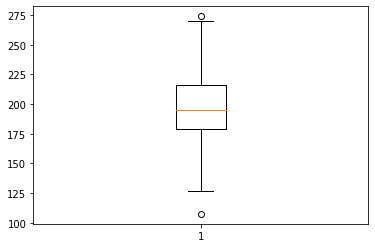

In [20]:
plt.boxplot(df7["max_speed"])

In [21]:
max_thre=216+ 1.5*(216 - 179)
max_thre

271.5

In [22]:
lower_t= 179 - 1.5*(216 - 179)
lower_t

123.5

In [23]:
df8=df7[(df7.max_speed<max_thre)&(df7.max_speed>lower_t)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f101c327ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f101c3351c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f101c327760>],
 'medians': [<matplotlib.lines.Line2D at 0x7f101c335880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f101c335be0>],
 'means': []}

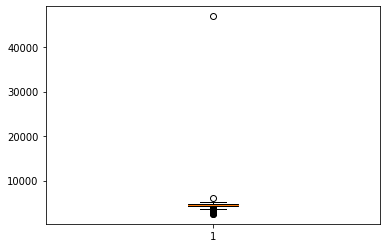

In [24]:
plt.boxplot(df8["lenght"])

In [25]:
max_thres=4690+ 1.5*(4690 - 4236)
max_thres

5371.0

In [26]:
lower_th= 4236 - 1.5*(4690- 4236)
lower_th

3555.0

In [27]:
df9=df8[(df8.lenght<max_thres)&(df8.lenght>lower_th)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f101c301c70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f101c30d3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f101c301910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f101c30da60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f101c30ddc0>],
 'means': []}

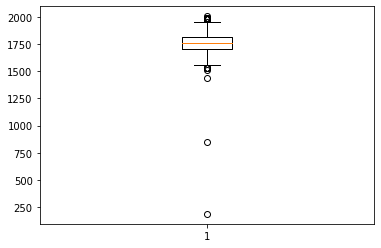

In [28]:
plt.boxplot(df9["width"])

In [29]:
max_thresh=1815+ 1.5*(1815 - 1706)
max_thresh

1978.5

In [30]:
lower_thr= 1706 - 1.5*(1815- 1706)
lower_thr

1542.5

In [31]:
df10=df9[(df9.width<max_thresh)&(df9.width>lower_thr)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f101c26c3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f101c26ca60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f101c26c040>],
 'medians': [<matplotlib.lines.Line2D at 0x7f101c277160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f101c2774c0>],
 'means': []}

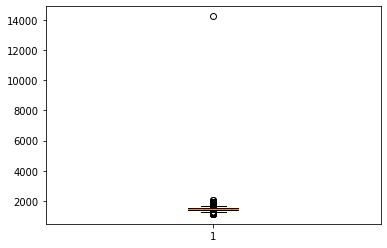

In [32]:
plt.boxplot(df10["height"])

In [33]:
max_thresho=1507+ 1.5*(1507 - 1420)
max_thresho

1637.5

In [34]:
lower_thre= 1420 - 1.5*(1507- 1420)
lower_thre

1289.5

In [35]:
df11=df10[(df10.height<max_thresho)&(df10.height>lower_thre)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f101c24b550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f101c24bc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f101c24b1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f101c1d7310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f101c1d7670>],
 'means': []}

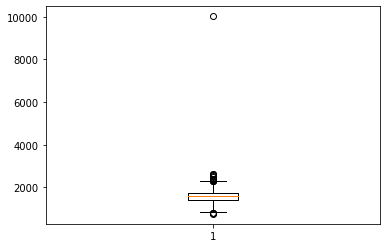

In [36]:
plt.boxplot(df11["weight"])

In [37]:
max_threshol=1757+ 1.5*(1757 - 1392.5)
max_threshol

2303.75

In [38]:
lower_thres= 1392 - 1.5*(1757 - 1392.5)
lower_thres

845.25

In [39]:
df12=df11[(df11.weight<max_threshol)&(df11.weight>lower_thres)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f101c1a4c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f101c1b0370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f101c1a48e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f101c1b0a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f101c1b0d90>],
 'means': []}

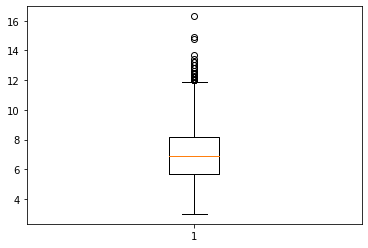

In [40]:
plt.boxplot(df12["fuel_consumption"])

In [41]:
max_=8.2+ 1.5*(8.2 - 5.7)
max_

11.949999999999998

In [42]:
df13=df12[df12.fuel_consumption<max_]

In [43]:
df13.describe()

,engine_capacity,cylinder,kw,acceleration,max_speed,lenght,width,height,weight,fuel_consumption
count,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000
mean,1920.994369,4.288283,102.864124,10.545559,200.248138,4422.937875,1755.145504,1454.122616,1577.530790,7.019982
std,495.294901,0.748726,37.092261,2.500777,25.308927,319.447033,66.534870,62.015723,250.620696,1.720687
min,875.000000,2.000000,34.000000,4.300000,135.000000,3557.000000,1555.000000,1290.000000,850.000000,3.000000
25%,1595.000000,4.000000,75.000000,8.600000,180.000000,4235.000000,1700.000000,1417.000000,1391.500000,5.700000
50%,1910.000000,4.000000,97.000000,10.350000,200.000000,4460.000000,1760.000000,1445.000000,1580.000000,6.900000
75%,1998.000000,4.000000,127.000000,12.200000,220.000000,4687.000000,1805.000000,1481.000000,1755.000000,8.200000
max,3697.000000,8.000000,209.000000,18.000000,270.000000,5265.000000,1949.000000,1637.000000,2297.500000,11.900000


In [44]:
df13.shape

(5505, 13)

## Data visulaization

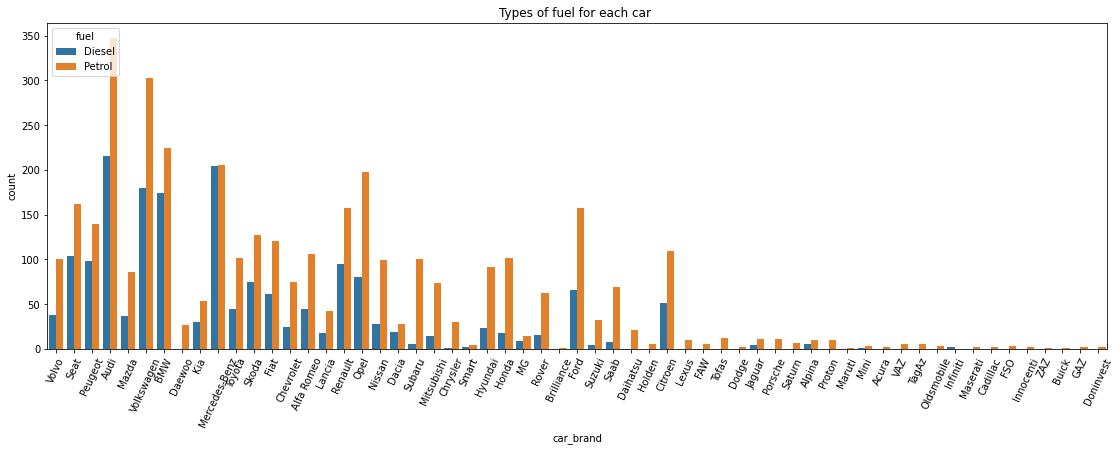

In [191]:
#Countplot
plt.figure(figsize=(19,6))
plt.xticks(rotation=65)
sns.countplot(x="car_brand",hue="fuel",data=df13)
plt.title("Types of fuel for each car ")
plt.show()

/home/mattdmv/anaconda3/envs/tensor/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


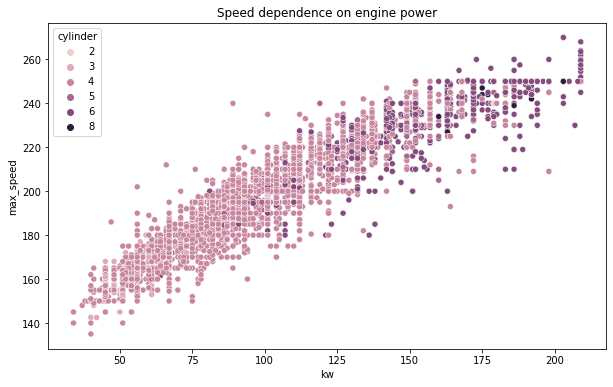

In [46]:
title = 'Speed dependence on engine power'
plt.figure(figsize=(10,6))
sns.scatterplot(df13.kw,df13.max_speed,hue=df13.cylinder).set_title(title)
plt.ioff()

/home/mattdmv/anaconda3/envs/tensor/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


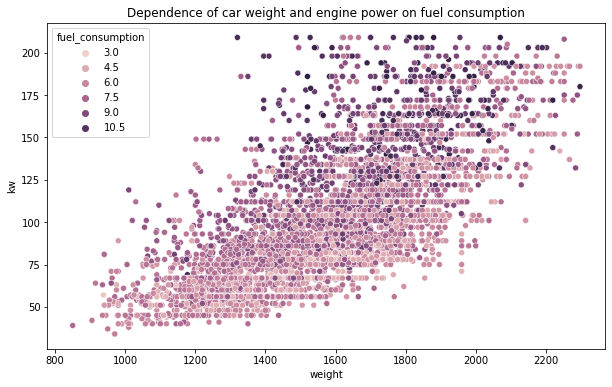

In [194]:
title = 'Dependence of car weight and engine power on fuel consumption'
plt.figure(figsize=(10,6))
sns.scatterplot(df13.weight,df13.kw,hue=df13.fuel_consumption).set_title(title)
plt.ioff()

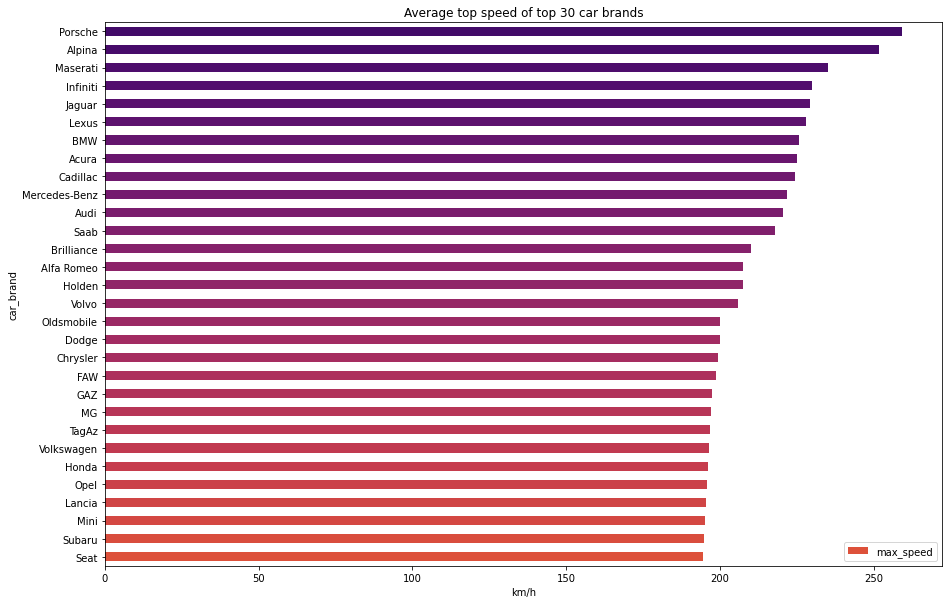

In [198]:
# Average top speed
location=df13.groupby("car_brand")["max_speed"].mean().reset_index("car_brand")
color = cm.inferno_r(np.linspace(.4, .8, 30))
location=location.sort_values("max_speed" , ascending=[True])[-30:]
location.plot.barh(x="car_brand", y='max_speed', color=color , figsize=(15,10))
plt.title("Average top speed of top 30 car brands")
plt.xlabel("km/h")
plt.show()

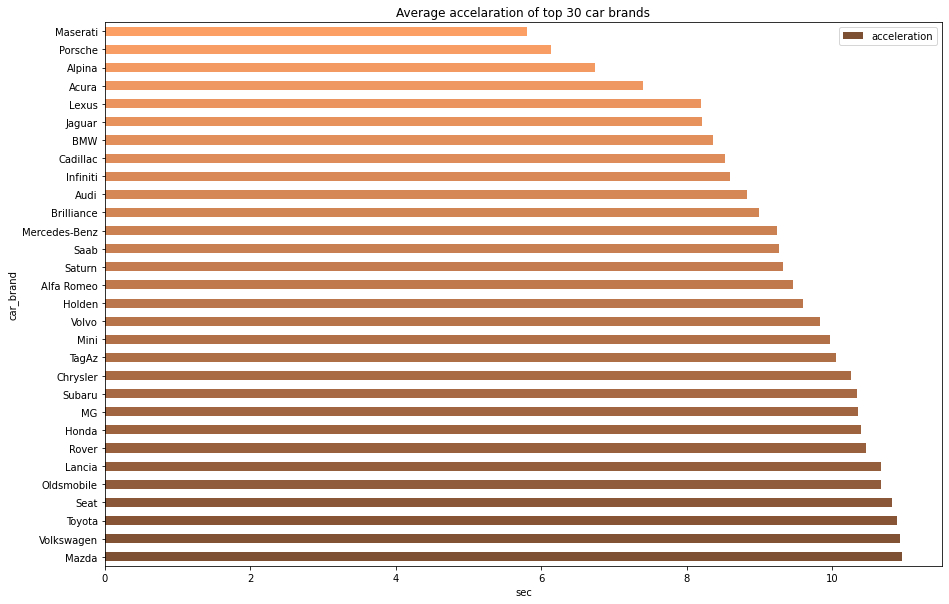

In [200]:
# Average acceleration
location=df13.groupby("car_brand")["acceleration"].mean().reset_index("car_brand")
color = cm.copper(np.linspace(.4, .8, 30))
location=location.sort_values("acceleration" , ascending=[False])[-30:]
location.plot.barh(x="car_brand", y='acceleration', color=color , figsize=(15,10))
plt.title("Average accelaration of top 30 car brands")
plt.xlabel("sec")
plt.show()

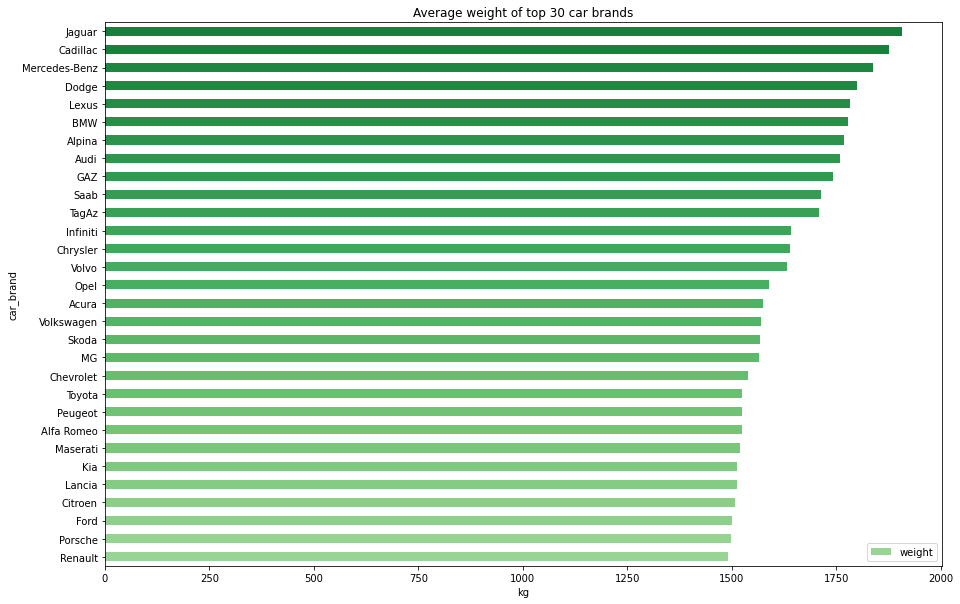

In [204]:
# Average weight
location=df13.groupby("car_brand")["weight"].mean().reset_index("car_brand")
color = cm.Greens(np.linspace(.4, .8, 30))
location=location.sort_values("weight" , ascending=[True])[-30:]
location.plot.barh(x="car_brand", y='weight', color=color , figsize=(15,10))
plt.title("Average weight of top 30 car brands")
plt.xlabel("kg")
plt.show()

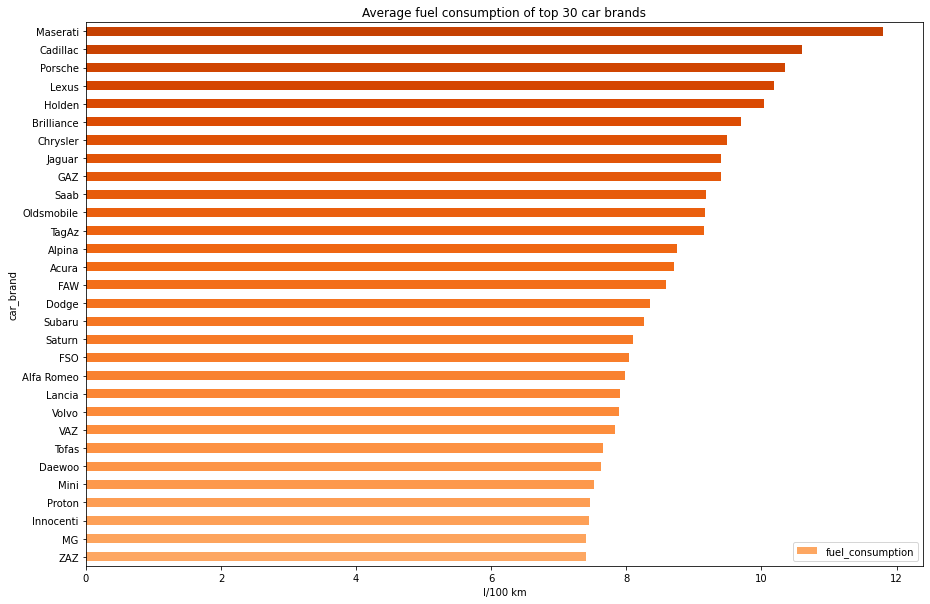

In [205]:
# Average fuel consumption
location=df13.groupby("car_brand")["fuel_consumption"].mean().reset_index("car_brand")
color = cm.Oranges(np.linspace(.4, .8, 30))
location=location.sort_values("fuel_consumption" , ascending=[True])[-30:]
location.plot.barh(x="car_brand", y='fuel_consumption', color=color , figsize=(15,10))
plt.title("Average fuel consumption of top 30 car brands")
plt.xlabel("l/100 km")
plt.show()

In [52]:
#top 10 car models with lowest fuel consumption
min_consumption=df13.groupby(["car_brand","car_model"])["fuel_consumption"].min().sort_values(ascending=[True])[:10]
min_consumption

car_brand   car_model
Audi        A2           3.0
Seat        Leon         3.3
            Ibiza        3.4
Citroen     DS5          3.4
Peugeot     208          3.4
Honda       Insight      3.4
Volkswagen  Polo         3.4
Renault     Clio         3.4
Fiat        Punto        3.5
Renault     Megane       3.5
Name: fuel_consumption, dtype: float64

In [53]:
##top 10 car models with highestfuel consumption
max_consumption=df13.groupby(["car_brand","car_model"])["fuel_consumption"].max().sort_values(ascending=[False])[:10]
max_consumption

car_brand   car_model
Opel        Omega        11.9
Chrysler    300C         11.9
Alfa Romeo  156          11.9
            166          11.9
Mitsubishi  Galant       11.8
Maserati    228          11.8
Lexus       IS           11.7
Alpina      B3           11.7
Audi        A6           11.7
            A8           11.7
Name: fuel_consumption, dtype: float64

## Analyzing audi cars

In [54]:
audi=df13[df13["car_brand"]=="Audi"]

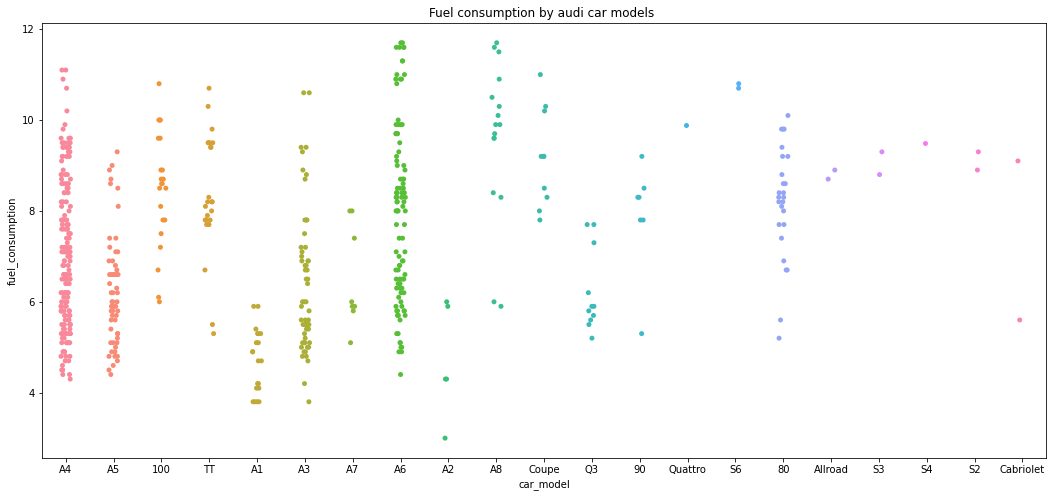

In [207]:
#fuel consumption by models
plt.figure(figsize=(18,8))
sns.stripplot(x="car_model",y="fuel_consumption",data=audi)
plt.title("Fuel consumption by audi car models ")
plt.show()

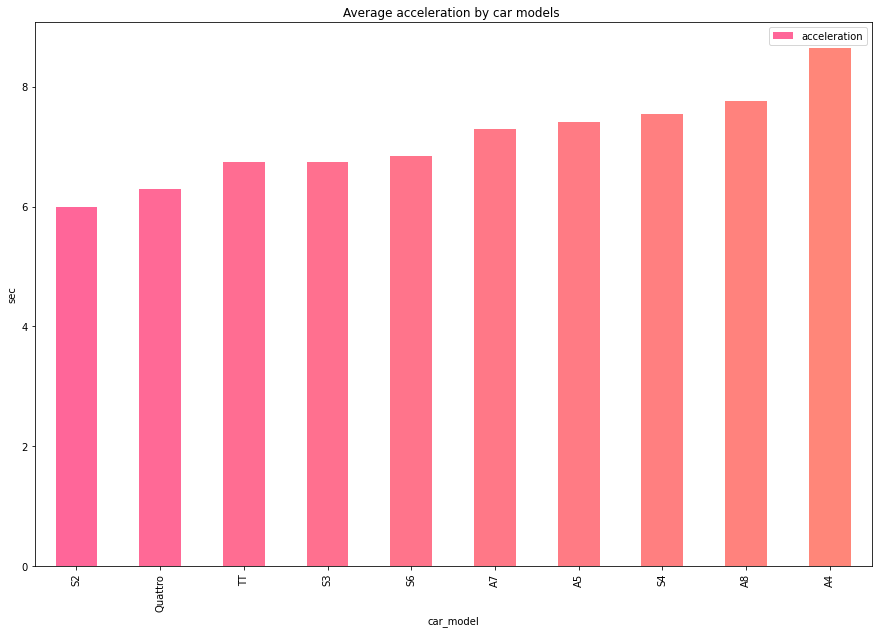

In [214]:
#average accelaration 
location=audi.groupby("car_model")["acceleration"].mean().reset_index("car_model")
color = cm.spring(np.linspace(.4, .8, 30))
location=location.sort_values("acceleration" , ascending=[True])[:10]
location.plot.bar(x="car_model", y='acceleration', color=color , figsize=(15,10))
plt.title("Average acceleration by car models ")
plt.ylabel("sec")
plt.show()

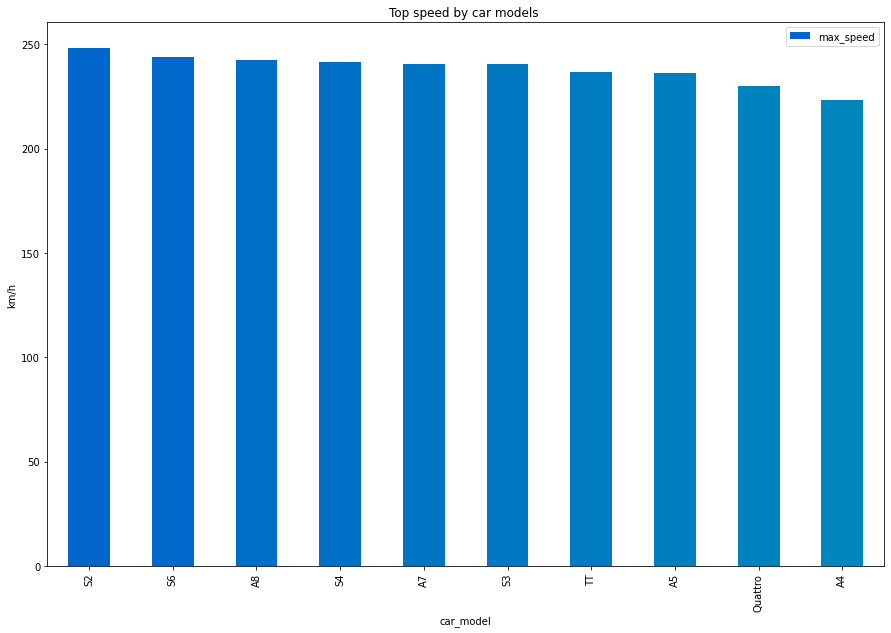

In [216]:
#top speed by car model
location=audi.groupby("car_model")["max_speed"].mean().reset_index("car_model")
color = cm.winter(np.linspace(.4, .8, 30))
location=location.sort_values("max_speed" , ascending=[False])[:10]
location.plot.bar(x="car_model", y='max_speed', color=color , figsize=(15,10))
plt.title("Top speed by car models ")
plt.ylabel("km/h")
plt.show()

<AxesSubplot:>

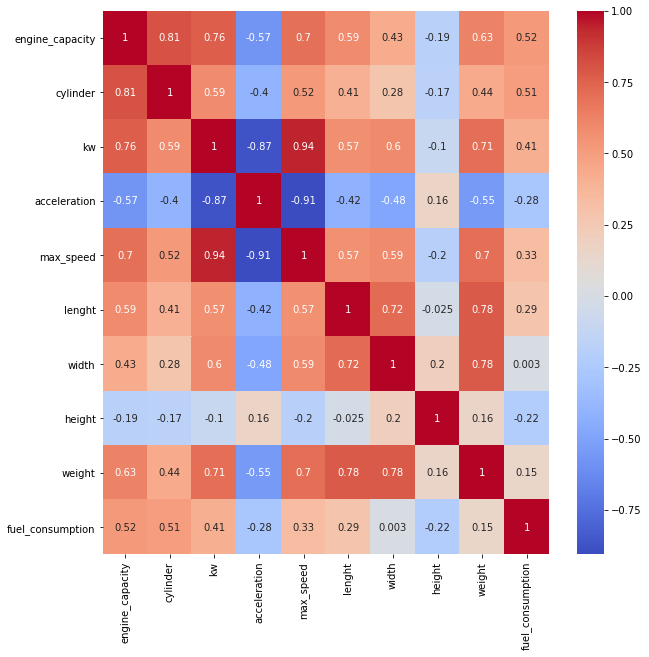

In [58]:
# visualizing correlations 
plt.figure(figsize=(10,10))
sns.heatmap(df13.corr(), annot=True, cmap='coolwarm')

In [59]:
#droping unnecessary features
df14=df13.drop(["engine_capacity","width","height","lenght","max_speed","car_model"],axis=1)

<AxesSubplot:>

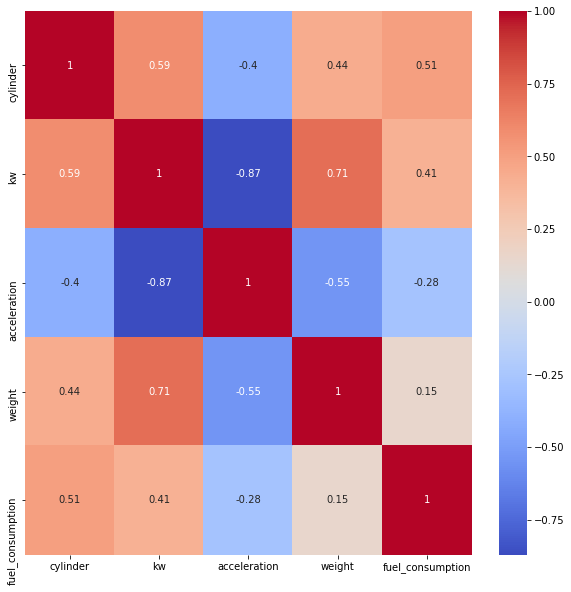

In [60]:
# visualizing correlations 
plt.figure(figsize=(10,10))
sns.heatmap(df14.corr(), annot=True, cmap='coolwarm')

## Preparing data

In [61]:
#counting brands
brand_stat=df14["car_brand"].value_counts()
brand_stat[-10:]

Infiniti      2
Acura         2
Doninvest     2
Innocenti     2
GAZ           2
Dodge         2
Buick         1
ZAZ           1
Brilliance    1
Maruti        1
Name: car_brand, dtype: int64

We will make function that will put all values that are less then 10 in "other" category.

In [62]:
less_10=brand_stat[brand_stat<10]
len(less_10)

21

In [63]:
df14["car_brand"]=df13["car_brand"].apply(lambda x: "other" if x in less_10 else x)

In [64]:
# replace brands with 0 and 1
df14.replace({"Diesel":0 ,"Petrol":1}, value=None, inplace=True)

In [65]:
#function for creating dummy columns
dummies = pd.get_dummies(df14["car_brand"])
dummies.head(5)

,Alfa Romeo,Alpina,Audi,BMW,Chevrolet,Chrysler,Citroen,Dacia,Daewoo,Daihatsu,...,Saab,Seat,Skoda,Subaru,Suzuki,Tofas,Toyota,Volkswagen,Volvo,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df15 = pd.concat([df14,dummies.drop("other",axis=1)],axis=1)
df15.head()

,car_brand,fuel,cylinder,kw,acceleration,weight,fuel_consumption,Alfa Romeo,Alpina,Audi,...,Rover,Saab,Seat,Skoda,Subaru,Suzuki,Tofas,Toyota,Volkswagen,Volvo
0,Volvo,0,5,104,10.6,1770.0,6.5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Seat,1,4,93,10.5,1669.0,6.5,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Peugeot,0,4,81,10.8,1325.0,4.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Audi,1,4,168,6.4,1842.5,6.6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Mazda,0,4,96,10.7,1782.5,5.2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df16 = df15.drop("car_brand",axis=1)
df16.head()

,fuel,cylinder,kw,acceleration,weight,fuel_consumption,Alfa Romeo,Alpina,Audi,BMW,...,Rover,Saab,Seat,Skoda,Subaru,Suzuki,Tofas,Toyota,Volkswagen,Volvo
0,0,5,104,10.6,1770.0,6.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,4,93,10.5,1669.0,6.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,4,81,10.8,1325.0,4.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,168,6.4,1842.5,6.6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,4,96,10.7,1782.5,5.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df16.shape

(5505, 44)

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [70]:
X=df16.drop(["fuel_consumption"],axis=1)
y=df16["fuel_consumption"]

In [71]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=10)

### Scaling 

In [72]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler
scaler=MinMaxScaler()

In [144]:
train_X = scaler.fit_transform(train_X)
test_X= scaler.transform(test_X)

### Building model

In [179]:
linear_model = tf.keras.Sequential([
    layers.Dense(128, activation='relu',input_shape=train_X[0].shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(units=1,activation="linear"), #linear regression
    layers.BatchNormalization()
    
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss="mse")

In [180]:
# Calculate validation results on training data
history=linear_model.fit(train_X,train_y,epochs=100,validation_data=(test_X,test_y),verbose=1)
history

Epoch 1/100
138/138 [==============================] - 1s 3ms/step - loss: 46.5002 - val_loss: 9.4637
Epoch 2/100
138/138 [==============================] - 0s 2ms/step - loss: 29.9326 - val_loss: 8.8870
Epoch 3/100
138/138 [==============================] - 0s 2ms/step - loss: 18.8322 - val_loss: 8.2799
Epoch 4/100
138/138 [==============================] - 0s 2ms/step - loss: 11.6396 - val_loss: 4.3121
Epoch 5/100
138/138 [==============================] - 0s 2ms/step - loss: 6.9463 - val_loss: 3.0441
Epoch 6/100
138/138 [==============================] - 0s 2ms/step - loss: 4.1753 - val_loss: 1.6046
Epoch 7/100
138/138 [==============================] - 0s 2ms/step - loss: 2.4252 - val_loss: 0.8889
Epoch 8/100
138/138 [==============================] - 0s 2ms/step - loss: 1.6181 - val_loss: 0.8688
Epoch 9/100
138/138 [==============================] - 0s 2ms/step - loss: 1.1751 - val_loss: 0.8453
Epoch 10/100
138/138 [==============================] - 0s 2ms/step - loss: 0.9880 - va

138/138 [==============================] - 0s 2ms/step - loss: 0.7011 - val_loss: 0.6296
Epoch 82/100
138/138 [==============================] - 0s 2ms/step - loss: 0.7838 - val_loss: 0.6088
Epoch 83/100
138/138 [==============================] - 0s 2ms/step - loss: 0.7899 - val_loss: 0.7132
Epoch 84/100
138/138 [==============================] - 0s 2ms/step - loss: 0.6547 - val_loss: 0.6902
Epoch 85/100
138/138 [==============================] - 0s 2ms/step - loss: 0.6916 - val_loss: 0.7185
Epoch 86/100
138/138 [==============================] - 0s 2ms/step - loss: 0.7496 - val_loss: 0.7470
Epoch 87/100
138/138 [==============================] - 0s 2ms/step - loss: 0.6787 - val_loss: 0.7338
Epoch 88/100
138/138 [==============================] - 0s 2ms/step - loss: 0.6702 - val_loss: 0.6842
Epoch 89/100
138/138 [==============================] - 0s 2ms/step - loss: 0.6681 - val_loss: 0.7167
Epoch 90/100
138/138 [==============================] - 0s 2ms/step - loss: 0.6666 - val_loss: 

### Evaluating model

In [181]:
linear_model.evaluate(
    test_X, test_y, verbose=1)

35/35 [==============================] - 0s 2ms/step - loss: 0.6087


0.6086801886558533

### Visualizing model performance

In [182]:
def learning_curve (history,epoch):
    epoch_range=range(1,epoch+1)
    plt.plot(epoch_range,history.history["loss"])
    plt.plot(epoch_range,history.history["val_loss"])
    plt.title("Model loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Train","Val"])
    plt.show()

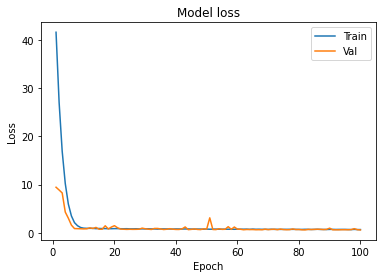

In [183]:
learning_curve(history,100)

### Visualizing predictions

In [184]:
pred= linear_model.predict(test_X).flatten()

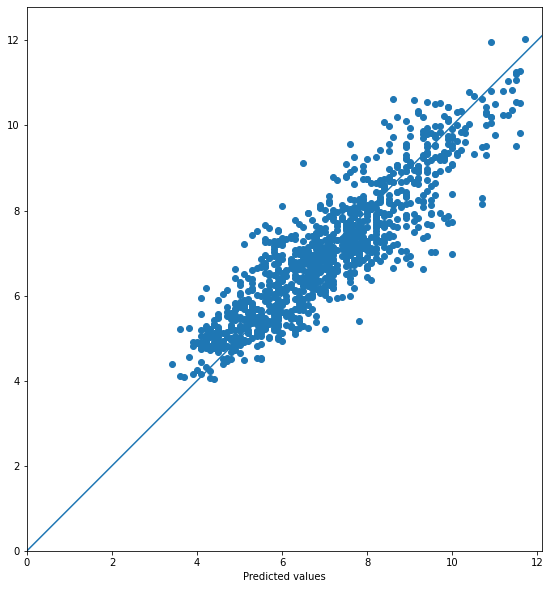

In [213]:
plt.figure(figsize=(10,10))
plt.scatter(test_y,pred)
plt.xlabel("True values")
plt.xlabel("Predicted values")
plt.axis("equal")
plt.axis("square")
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
a=plt.plot([-100,100],[-100,100])

In perfect world all values would be on line,but we can see that our model predicted pretty good.

# Results

In [189]:
result = pd.DataFrame({'Actual': test_y, 
                   'Predicted': pred})
result.sample(10)

,Actual,Predicted
4819,6.6,6.435761
5501,6.8,6.928358
7315,8.2,7.661993
2938,4.9,5.483836
2512,9.2,8.896635
1416,8.4,7.623769
7154,10.5,10.703638
2067,6.5,6.929720
6306,7.5,6.982861
533,6.5,7.085479
